In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import utils
from sklearn import preprocessing
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
warnings.filterwarnings('ignore')

In [6]:
# reading data from csv and loading it
dataset=pd.read_csv("RTA Dataset.csv")

In [7]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


1 - Data Cleaning

In [8]:
#checking missing values
dataset.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [9]:
#dropping columns with high number of missing values
dataset.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality'], axis = 1, inplace = True)

In [10]:
dataset.isna().sum()

Time                             0
Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              741
Vehicle_driver_relation        579
Driving_experience             829
Type_of_vehicle                950
Owner_of_vehicle               482
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                142
Types_of_Junction              887
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Sex_of_casualty                  0
Age_band_of_casualty             0
Casualty_severity                0
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64

In [93]:
categorical = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']
print('The categorical variables are',categorical)

The categorical variables are ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [12]:
#for categorical values we can replace the null values with Unknown
for i in categorical:
    dataset[i].fillna('Unknown',inplace=True)

In [13]:
#now no null values should be in cols
dataset.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [14]:
#checking col driving experience
dataset['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', 'Unknown', 'No Licence',
       'Below 1yr', 'unknown'], dtype=object)

In [15]:
for index, row in dataset.loc[:, ['Driving_experience']].iterrows():
    if(row['Driving_experience']=='unknown'):
        dataset.loc[index, 'Driving_experience'] = 'Unknown'

In [16]:
#removed small case unknowns
dataset['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', 'Unknown', 'No Licence',
       'Below 1yr'], dtype=object)

In [17]:
#checking col Type_of_vehicle
dataset['Type_of_vehicle'].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', 'Unknown',
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [18]:
#cleaning type of vehicle column
for index, row in dataset.loc[:, ['Type_of_vehicle']].iterrows():
    if(row['Type_of_vehicle']=='Public (> 45 seats)' or row['Type_of_vehicle']=='Public (12 seats)' or row['Type_of_vehicle']=='Public (13?45 seats)'):
        dataset.loc[index, 'Type_of_vehicle'] = 'Public'
    if(row['Type_of_vehicle']=='Lorry (41?100Q)' or row['Type_of_vehicle']=='Lorry (11?40Q)' or row['Type_of_vehicle']=='Long lorry'):
        dataset.loc[index, 'Type_of_vehicle'] = 'Lorry'

In [19]:
dataset['Type_of_vehicle'].unique()

array(['Automobile', 'Public', 'Lorry', 'Unknown', 'Taxi',
       'Pick up upto 10Q', 'Stationwagen', 'Ridden horse', 'Other',
       'Bajaj', 'Turbo', 'Motorcycle', 'Special vehicle', 'Bicycle'],
      dtype=object)

In [20]:
#cleaning keyword na from rows to Unknown
for col in dataset.columns:
    for index, row in dataset.loc[:, [col]].iterrows():
        if(row[col]=='na'):
            dataset.loc[index, col] = 'Unknown'

In [21]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public,Owner,Office areas,...,2,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry,Owner,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public,Governmental,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Unknown,Owner,Industrial areas,...,2,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury


In [22]:
# convert object type column into datetime datatype column
dataset['Time'] = pd.to_datetime(dataset['Time'])

In [23]:
dataframe = dataset.copy()
dataframe['Hour_of_Day'] = dataframe['Time'].dt.hour
dataframe = dataframe.drop('Time', axis=1)
dataframe.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,Unknown,...,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public,Owner,Office areas,Undivided Two way,...,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry,Owner,Recreational areas,other,...,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public,Governmental,Office areas,other,...,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Unknown,Owner,Industrial areas,other,...,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury,1


2 - Data Exploration

In [24]:
#Target Variable Classification
print(dataframe['Accident_severity'].value_counts())

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


<AxesSubplot: xlabel='Accident_severity'>

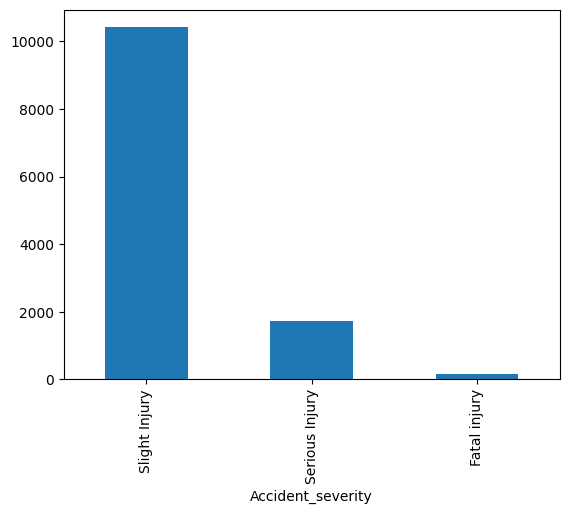

In [25]:
dataframe['Accident_severity'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='Educational_level'>

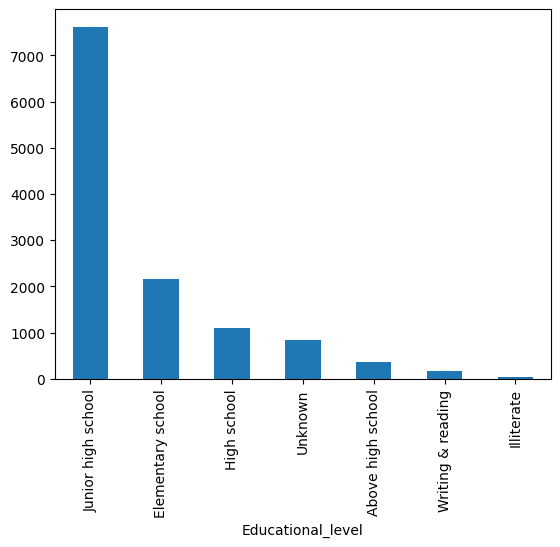

In [26]:
dataframe['Educational_level'].value_counts().plot(kind='bar')

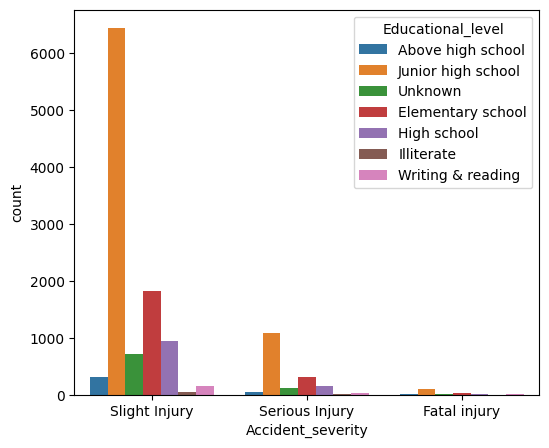

In [52]:
# Educational level with accident severity
plt.figure(figsize=(6,5))
sns.countplot(x='Accident_severity', data=dataframe,  hue="Educational_level")
plt.xticks(rotation=0)
plt.show()

Road_surface_type
Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Unknown                               172
Other                                 167
Asphalt roads with some distress       81
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

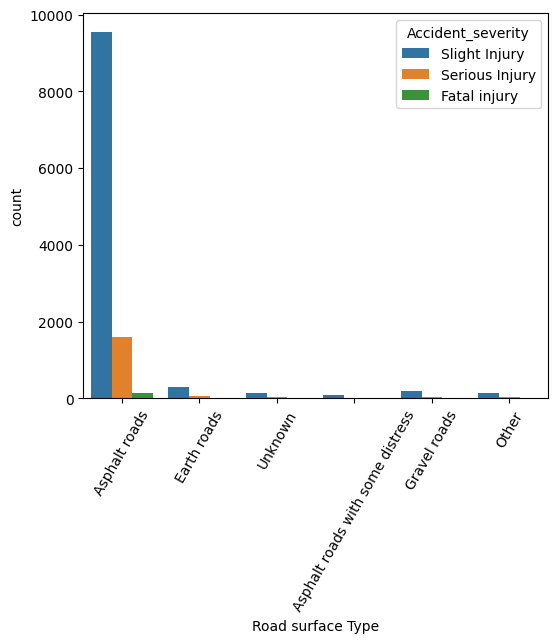

In [128]:
# Road Surface type with accident severity
print(dataframe['Road_surface_type'].value_counts())

plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=dataframe)
plt.xlabel('Road surface Type')
plt.xticks(rotation=60)
plt.show

Road_surface_conditions
Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

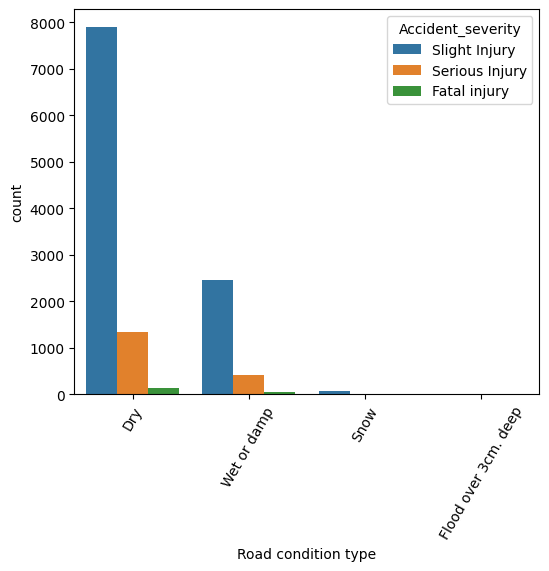

In [127]:
# Road Surface conditions with accident severity
print(dataframe['Road_surface_conditions'].value_counts())

plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_conditions', hue='Accident_severity', data=dataframe)
plt.xlabel('Road condition type')
plt.xticks(rotation=60)
plt.show

In [61]:
#data values for road surface type
dataframe_pivot_table = pd.pivot_table(data=dataframe, 
               index='Road_surface_conditions', 
               columns='Accident_severity',
               aggfunc='count')
road_surface_df = dataframe_pivot_table['Road_surface_type']
road_surface_df.fillna(0, inplace=True)
road_surface_df['sum of injuries'] = road_surface_df['Fatal injury'] + road_surface_df['Serious Injury'] + road_surface_df['Slight Injury']
road_surface_df


Accident_severity,Fatal injury,Serious Injury,Slight Injury,sum of injuries
Road_surface_conditions,,,,
Dry,121.0,1332.0,7887.0,9340.0
Flood over 3cm. deep,0.0,0.0,2.0,2.0
Snow,0.0,4.0,66.0,70.0
Wet or damp,37.0,407.0,2460.0,2904.0


Data Visualization for all categorical cols

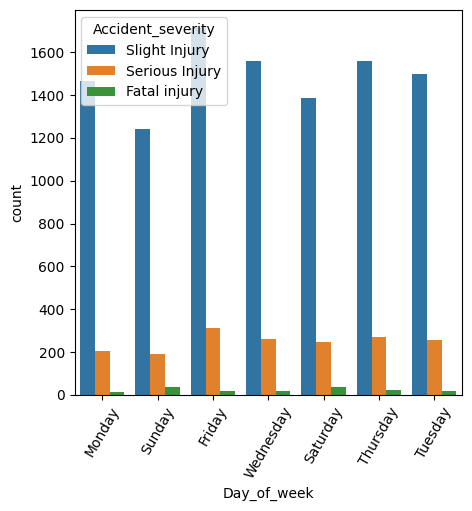

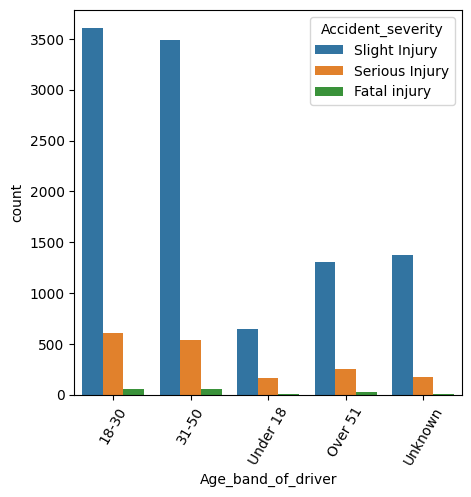

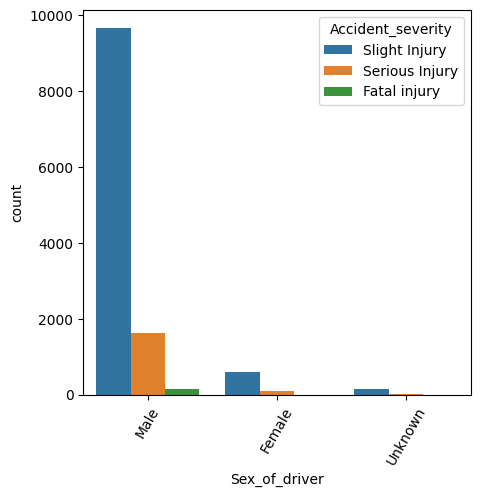

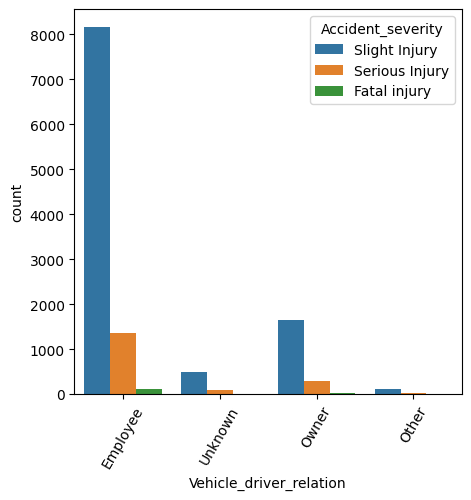

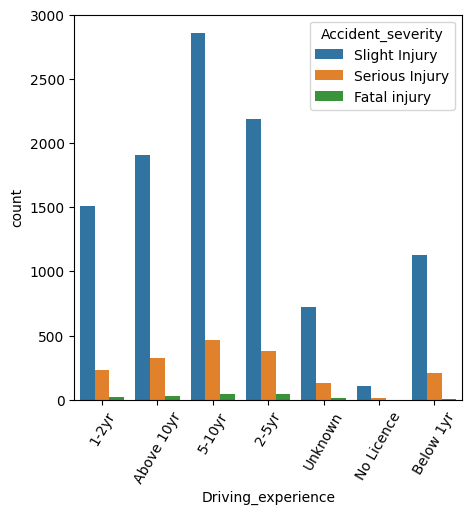

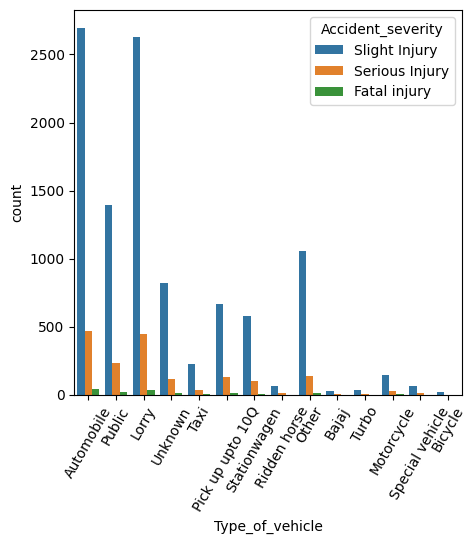

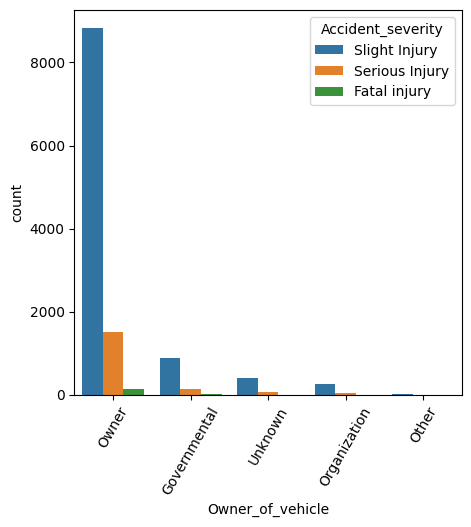

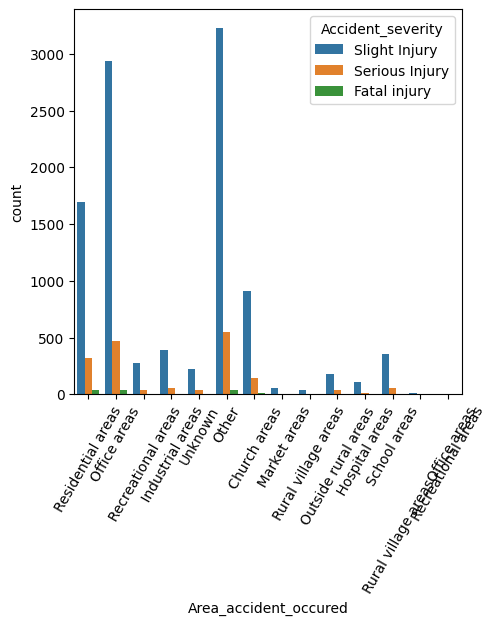

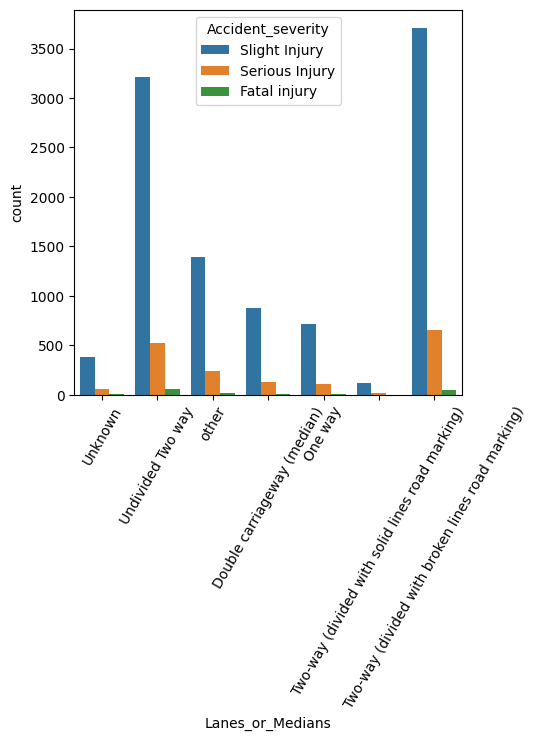

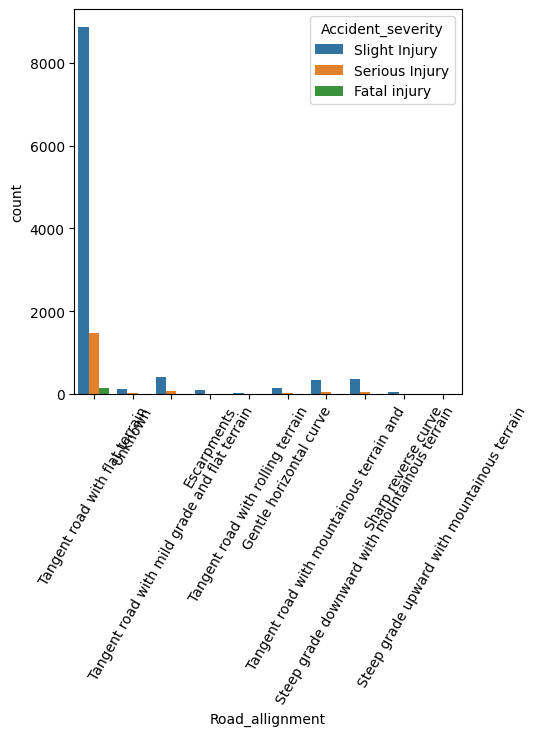

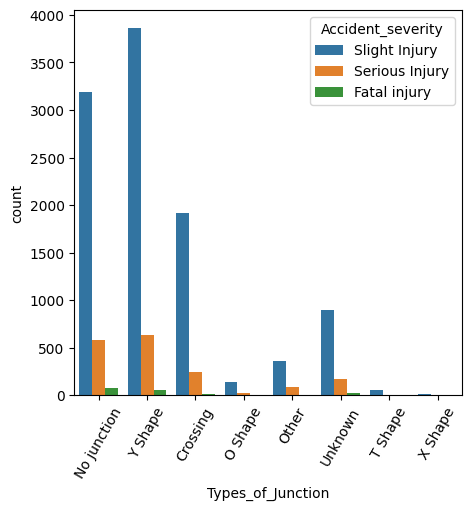

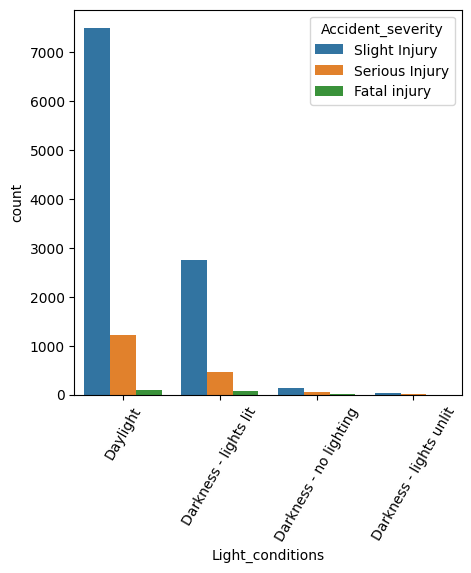

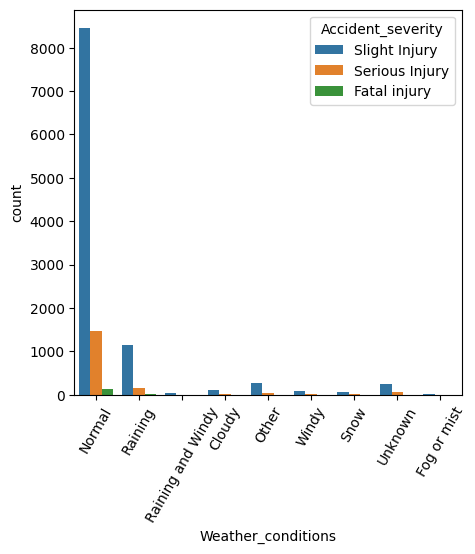

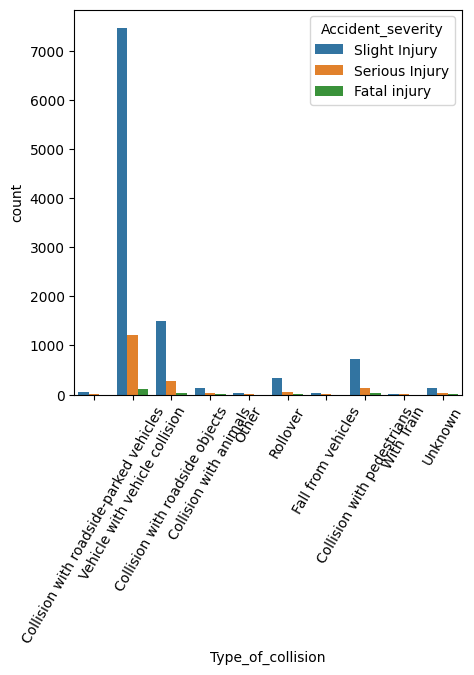

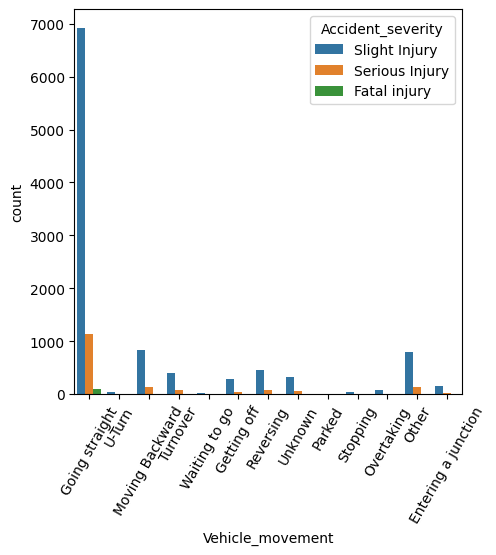

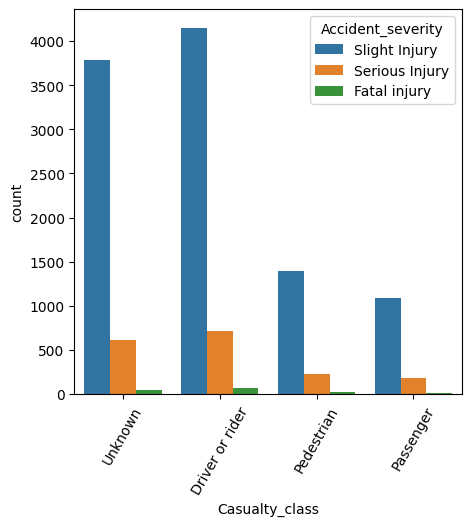

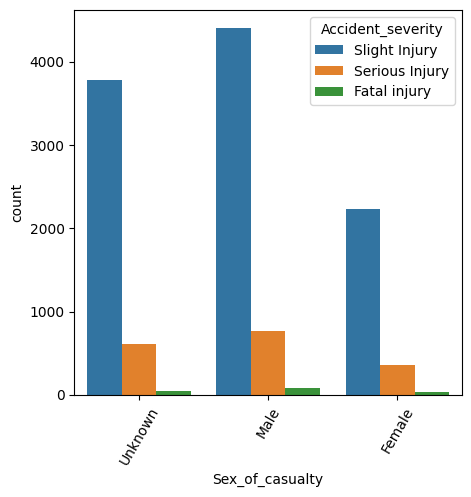

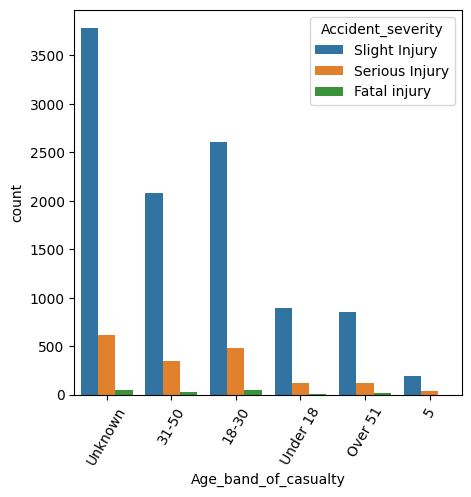

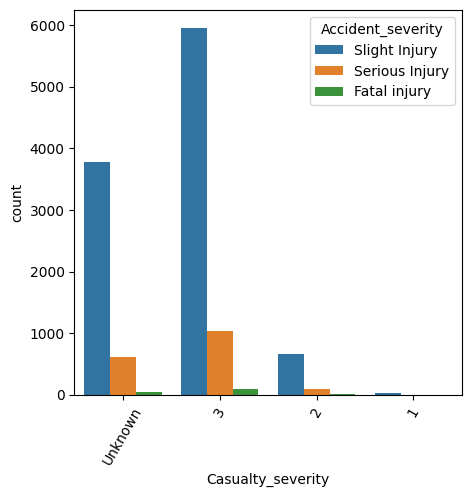

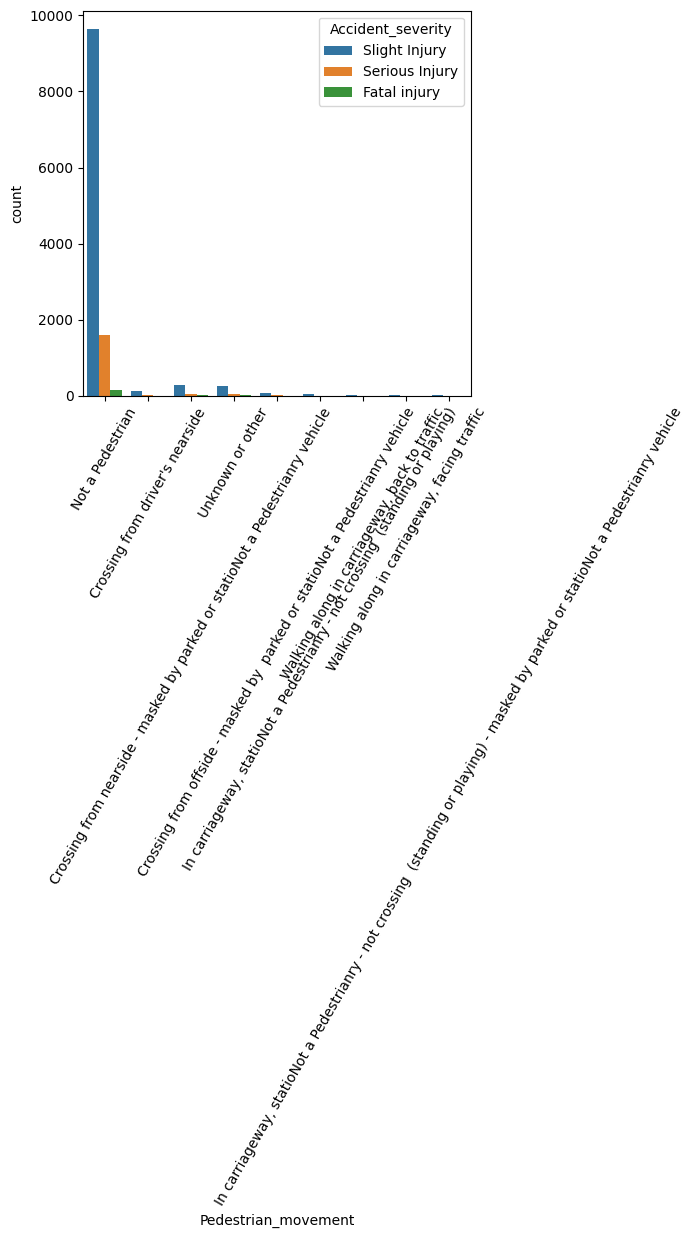

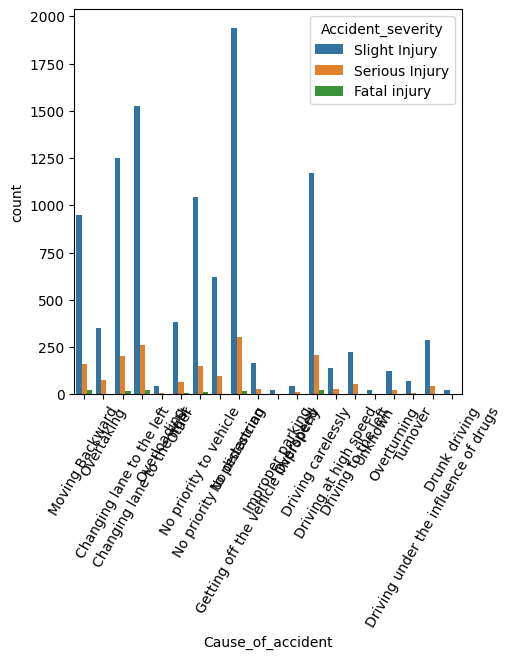

In [131]:
#using categorical array from above
for col in categorical:
    #excluding road surface , road conditions, Accident_severity and education level as already visualized above
    if(col!='Road_surface_type' and col!='Road_surface_conditions' and col!='Educational_level' and col!='Accident_severity'):
        utils.countPlots(col, plt, dataframe, sns)


<Figure size 500x500 with 0 Axes>

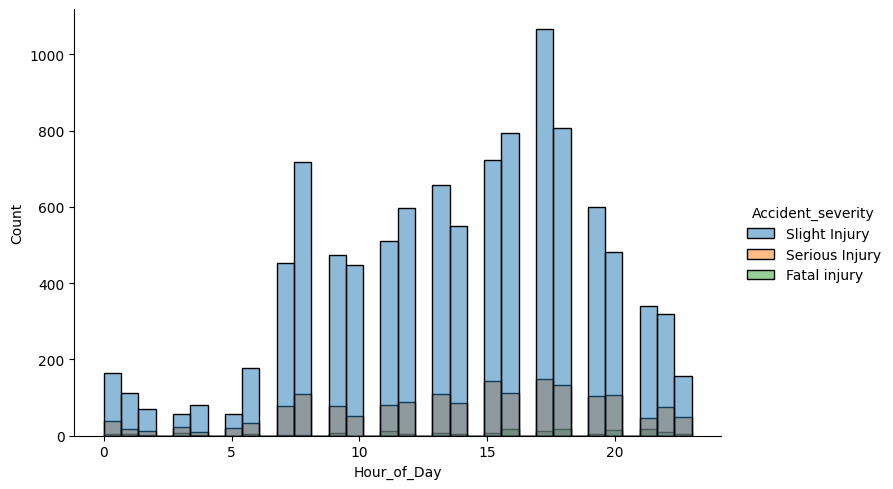

In [118]:
# disribution for hour of the day
plt.figure(figsize=(5,5))
sns.displot(x='Hour_of_Day', hue='Accident_severity', data=dataframe, aspect=1.5)
plt.show()

1) Data is highly imbalanced
2) Hour of day seems to be important to predict accident severity
3) categorical cols need to be encoded
4) chi square analysis need to be done for feature selection

3 - Feature Selection

In [133]:
#selecting all cat variables as features
features = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident']

feature_dataframe = dataframe[features]
target = dataframe['Accident_severity']


In [181]:
#new feature dataframe info
feature_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Day_of_week              12316 non-null  object
 1   Age_band_of_driver       12316 non-null  object
 2   Sex_of_driver            12316 non-null  object
 3   Educational_level        12316 non-null  object
 4   Vehicle_driver_relation  12316 non-null  object
 5   Driving_experience       12316 non-null  object
 6   Type_of_vehicle          12316 non-null  object
 7   Owner_of_vehicle         12316 non-null  object
 8   Area_accident_occured    12316 non-null  object
 9   Lanes_or_Medians         12316 non-null  object
 10  Road_allignment          12316 non-null  object
 11  Types_of_Junction        12316 non-null  object
 12  Road_surface_type        12316 non-null  object
 13  Road_surface_conditions  12316 non-null  object
 14  Light_conditions         12316 non-nul

In [182]:
#One hot encoding or encoding into dummy variables using get dummies
x = feature_dataframe[features]
y = target
encoded_df = pd.get_dummies(x)
encoded_df.shape

(12316, 183)

In [183]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(y)
print("Encoded labels:",label_encoder.classes_)
target_en= label_encoder.fit_transform(y)
target_en

# 1: serious injury, 2: Slight injury, 0: Fatal Injury


Encoded labels: ['Fatal injury' 'Serious Injury' 'Slight Injury']


array([2, 2, 1, ..., 1, 2, 2])

In [184]:
encoded_df.to_csv('encoded.csv')

In [194]:
#Feature selection using chi2 k best method
test = SelectKBest(score_func=chi2, k=40)
fit = test.fit(encoded_df, target_en)
print(test.get_feature_names_out())
print('p_values', fit.pvalues_)


['Day_of_week_Friday' 'Day_of_week_Monday' 'Day_of_week_Saturday'
 'Day_of_week_Sunday' 'Age_band_of_driver_Over 51'
 'Age_band_of_driver_Under 18' 'Age_band_of_driver_Unknown'
 'Driving_experience_2-5yr' 'Driving_experience_Below 1yr'
 'Type_of_vehicle_Other' 'Type_of_vehicle_Pick up upto 10Q'
 'Area_accident_occured_  Market areas'
 'Area_accident_occured_  Recreational areas'
 'Area_accident_occured_ Outside rural areas'
 'Area_accident_occured_Recreational areas'
 'Area_accident_occured_Residential areas'
 'Area_accident_occured_Rural village areasOffice areas'
 'Lanes_or_Medians_Double carriageway (median)'
 'Road_allignment_Steep grade upward with mountainous terrain'
 'Types_of_Junction_Crossing' 'Types_of_Junction_No junction'
 'Types_of_Junction_Other' 'Road_surface_type_Gravel roads'
 'Road_surface_conditions_Snow' 'Light_conditions_Darkness - lights lit'
 'Light_conditions_Darkness - no lighting' 'Light_conditions_Daylight'
 'Weather_conditions_Cloudy' 'Weather_conditions_Ot